In [1]:
from pymonntorch import *
from matplotlib import pyplot as plt
import numpy as np
from timeRes import TimeResolution
from current import *
from lif import LIF
from synapse import *

In [18]:

net = Network(behavior={1: TimeResolution()}, dtype=torch.float64)
ng1 = NeuronGroup(
    1,
    net=net,
    behavior={
        2: ConstantCurrent(value=70),
        3: InpSyn(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-73.42,
            threshold=-35,
            R=1,
        ),
        9: Recorder(variables=["v", "I"], tag="ng1_rec, ng1_recorder"),
        10: EventRecorder("spike", tag="ng1_evrec"),
    },
    tag="NG1",
)


ng2 = NeuronGroup(
    1,
    net=net,
    behavior={
        2: ConstantCurrent(value=25),
        3: InpSyn(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-73.42,
            threshold=-35,
            R=1,
        ),
        9: Recorder(variables=["v", "I"], tag="ng2_rec, ng2_recorder"),
        10: EventRecorder("spike", tag="ng2_evrec"),
    },
    tag="NG2",
)

SynapseGroup(net=net,
            src=ng1, 
            dst=ng2, 
            behavior={
                4: SynFun(),
            })

SynapseGroup['SynapseGroup_1', 'SynapseGroup', 'syn', 'NG1 => NG2'](S1xD1){4:SynFun(),}

In [19]:
net.initialize()
net.simulate_iterations(100)

Network['Network_1', 'Network'](Neurons: tensor(2)|2 groups, Synapses: tensor(1)|1 groups){1:TimeResolution()}
NeuronGroup['NG1', 'NeuronGroup', 'ng'](1){2:ConstantCurrent(value=70,)3:InpSyn()5:LIF(tau=10,u_rest=-65,u_reset=-73.42,threshold=-35,R=1,)9:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng1_rec, ng1_recorder,)10:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=ng1_evrec,arg_0=spike,)}
NeuronGroup['NG2', 'NeuronGroup', 'ng'](1){2:ConstantCurrent(value=25,)3:InpSyn()5:LIF(tau=10,u_rest=-65,u_reset=-73.42,threshold=-35,R=1,)9:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng2_rec, ng2_recorder,)10:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=ng2_evrec,arg_0=spike,)}
SynapseGroup['SynapseGroup_1', 'SynapseGroup', 'syn', 'NG1 => NG2'](S1xD1){4:SynFun(),}
100xBatch: 1/1 (100%) 161.090ms


161.08989715576172

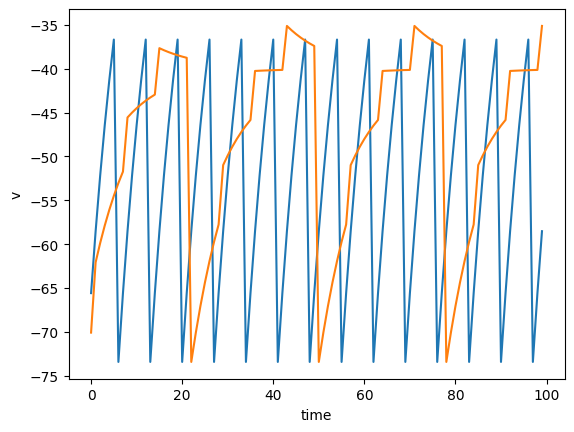

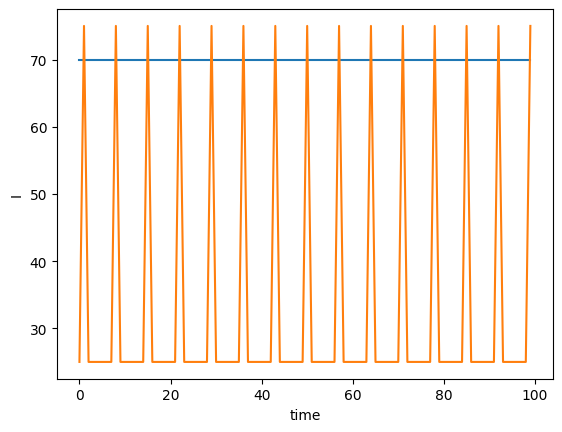

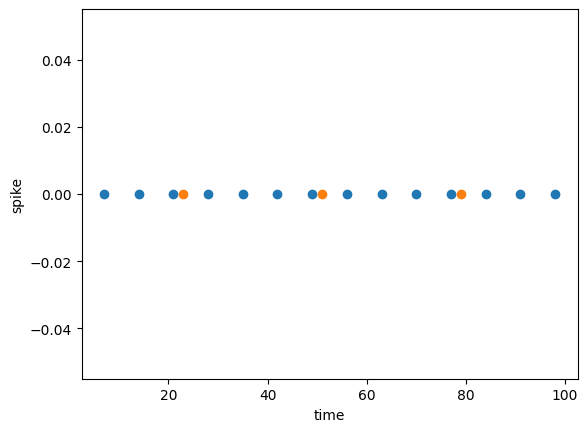

In [20]:
plt.plot(net["v", 0][:,:20])
plt.plot(net["v", 1][:,:20])
plt.xlabel("time")
plt.ylabel("v")
plt.show()
plt.plot(net["I", 0][:,:20])
plt.plot(net["I", 1][:,:20])
plt.xlabel("time")
plt.ylabel("I")
plt.show()

plt.scatter(net["spike", 0][:,0], net["spike", 0][:,1])
plt.xlabel("time")
plt.ylabel("spike")
plt.scatter(net["spike", 1][:,0], net["spike", 1][:,1])
plt.show()